In [1]:
import pandas as pd

In [2]:
arxiv_df = pd.read_csv("arxiv_publications.csv")

In [3]:
arxiv_df = arxiv_df[arxiv_df.published.gt("2017")].sort_values(by="published")[["published","url"]]

In [4]:
arxiv_df["published"] = pd.to_datetime(arxiv_df["published"])

In [5]:
arxiv_df = arxiv_df.set_index("published")

In [6]:
arxiv_df

,url
published,
2017-01-01 00:00:00+00:00,5
2017-02-01 00:00:00+00:00,3
2017-03-01 00:00:00+00:00,7
2017-04-01 00:00:00+00:00,3
2017-05-01 00:00:00+00:00,6
...,...
2022-05-01 00:00:00+00:00,30
2022-06-01 00:00:00+00:00,35
2022-07-01 00:00:00+00:00,49


In [7]:
github_df = pd.read_csv("github_sum_commits.csv")

In [8]:
github_df = github_df[github_df.commit_date.gt("2017")].sort_values(by="commit_date")

In [9]:
github_df["commit_date"] = pd.to_datetime(github_df["commit_date"])

In [10]:
github_df = github_df.set_index("commit_date")

In [11]:
github_df

,commits
commit_date,
2017-01-01 00:00:00+00:00,31
2017-02-01 00:00:00+00:00,5
2017-03-01 00:00:00+00:00,17
2017-04-01 00:00:00+00:00,14
2017-05-01 00:00:00+00:00,3
...,...
2022-05-01 00:00:00+00:00,733
2022-06-01 00:00:00+00:00,505
2022-07-01 00:00:00+00:00,466


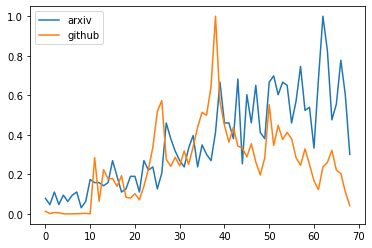

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")
ax.legend()
plt.show()

In [13]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(np.array([arxiv_df.url.values ,github_df.commits.values]).T, maxlag=[7])

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.8170  , p=0.0155  , df_denom=47, df_num=7
ssr based chi2 test:   chi2=26.0127 , p=0.0005  , df=7
likelihood ratio test: chi2=21.7215 , p=0.0028  , df=7
parameter F test:         F=2.8170  , p=0.0155  , df_denom=47, df_num=7


{7: ({'ssr_ftest': (2.8170461750655638, 0.015541330460078414, 47.0, 7),
   'ssr_chi2test': (26.01272425486074, 0.0005010386707734874, 7),
   'lrtest': (21.721514792711787, 0.002836884916022801, 7),
   'params_ftest': (2.8170461750654994, 0.015541330460080343, 47.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [14]:
#Counter test for reverse granger, luckily it fails
grangercausalitytests(np.array([github_df.commits.values, arxiv_df.url.values ]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0782  , p=0.7797  , df=1
likelihood ratio test: chi2=0.0782  , p=0.7798  , df=1
parameter F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0122  , p=0.9939  , df=2
likelihood ratio test: chi2=0.0122  , p=0.9939  , df=2
parameter F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1226  , p=0.9890  , df=3
likelihood ratio test: chi2=0.1225  , p=0.9890  , df=3
parameter F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2591  , p=0.9029  , df_d

{1: ({'ssr_ftest': (0.074780167122314, 0.7853669684275719, 65.0, 1),
   'ssr_chi2test': (0.07823155945103619, 0.7797084060334376, 1),
   'lrtest': (0.07818659263557493, 0.7797700926201068, 1),
   'params_ftest': (0.07478016712230626, 0.7853669684275719, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.005652489167982575, 0.9943639684572566, 62.0, 2),
   'ssr_chi2test': (0.012216670137252663, 0.9939102828825126, 2),
   'lrtest': (0.012215556488854418, 0.9939108363159639, 2),
   'params_ftest': (0.005652489167977993, 0.99436396845726, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.03654391209709693, 0.9905543542845325, 59.0, 3),
   'ssr_chi2test': (0.12263889144449477, 0.988988694768871, 3),
   'lrtest': (0.12252509074721729, 0.9890036450713178, 3),
   'params_ftest': (0.03654391209710494, 0.99055435428453, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

In [15]:
#normalized granger
grangercausalitytests(np.array([arxiv_df.url.values/arxiv_df.url.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.8606  , p=0.0067  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=8.2234  , p=0.0041  , df=1
likelihood ratio test: chi2=7.7630  , p=0.0053  , df=1
parameter F test:         F=7.8606  , p=0.0067  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5139  , p=0.0358  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=7.5946  , p=0.0224  , df=2
likelihood ratio test: chi2=7.1941  , p=0.0274  , df=2
parameter F test:         F=3.5139  , p=0.0358  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4076  , p=0.0761  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=8.0798  , p=0.0444  , df=3
likelihood ratio test: chi2=7.6222  , p=0.0545  , df=3
parameter F test:         F=2.4076  , p=0.0761  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8206  , p=0.1377  , df_d

{1: ({'ssr_ftest': (7.860648058759264, 0.0066536104971067185, 65.0, 1),
   'ssr_chi2test': (8.22344719993277, 0.004135257342029305, 1),
   'lrtest': (7.762976302998368, 0.0053328011885559095, 1),
   'params_ftest': (7.8606480587592555, 0.006653610497106779, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.5138997693763447, 0.03584243190628329, 62.0, 2),
   'ssr_chi2test': (7.5945575660714555, 0.02243173048325287, 2),
   'lrtest': (7.194120328693884, 0.02740416789097073, 2),
   'params_ftest': (3.513899769376342, 0.03584243190628329, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.40761261475745, 0.0761394956817986, 59.0, 3),
   'ssr_chi2test': (8.07978470715212, 0.044391255880324436, 3),
   'lrtest': (7.622204177697597, 0.05450026018061172, 3),
   'params_ftest': (2.407612614757451, 0.0761394956817986, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [16]:
#reverse normalized granger
grangercausalitytests(np.array([github_df.commits.values/github_df.commits.values.max(),arxiv_df.url.values/arxiv_df.url.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.0782  , p=0.7797  , df=1
likelihood ratio test: chi2=0.0782  , p=0.7798  , df=1
parameter F test:         F=0.0748  , p=0.7854  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.0122  , p=0.9939  , df=2
likelihood ratio test: chi2=0.0122  , p=0.9939  , df=2
parameter F test:         F=0.0057  , p=0.9944  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=0.1226  , p=0.9890  , df=3
likelihood ratio test: chi2=0.1225  , p=0.9890  , df=3
parameter F test:         F=0.0365  , p=0.9906  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2591  , p=0.9029  , df_d

{1: ({'ssr_ftest': (0.07478016712229293, 0.7853669684275922, 65.0, 1),
   'ssr_chi2test': (0.07823155945101415, 0.7797084060334677, 1),
   'lrtest': (0.07818659263557493, 0.7797700926201068, 1),
   'params_ftest': (0.07478016712230315, 0.7853669684275922, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.005652489167971732, 0.9943639684572668, 62.0, 2),
   'ssr_chi2test': (0.012216670137229229, 0.9939102828825241, 2),
   'lrtest': (0.012215556488797574, 0.9939108363159921, 2),
   'params_ftest': (0.005652489167981855, 0.9943639684572566, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.03654391209710606, 0.9905543542845292, 59.0, 3),
   'ssr_chi2test': (0.12263889144452543, 0.988988694768867, 3),
   'lrtest': (0.12252509074721729, 0.9890036450713178, 3),
   'params_ftest': (0.03654391209710394, 0.99055435428453, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

Conclusions:
- Reverse granger luckily fails
- Unnormalized granger good at 7
- Normalized granger extremely good at 1
- Interestingly normalized granger recovers exact unnormalized at 7
- Normalized reverse granger luckily fails

In [17]:
google_trends_df = pd.read_csv("google_trends.csv")#, header=1)

google_trends_df = google_trends_df[google_trends_df.month.gt("2017")].sort_values(by="month")
google_trends_df["month"] = pd.to_datetime(google_trends_df["month"])
google_trends_df = google_trends_df.set_index("month")
google_trends_df

,search_freq
month,
2017-01-01,0
2017-02-01,0
2017-03-01,0
2017-04-01,0
2017-05-01,0
...,...
2022-05-01,82
2022-06-01,78
2022-07-01,77


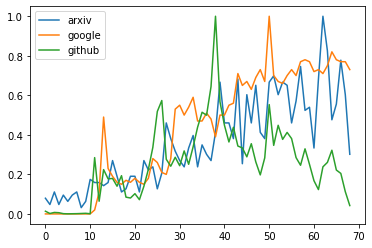

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

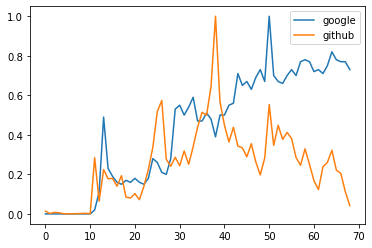

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#ax.plot(arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")
ax.plot(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="google")
ax.plot(github_df.commits.values/github_df.commits.values.max(), label="github")

ax.legend()
plt.show()

In [20]:
#is it off by 1 bug or reality, that github is earlier???
#what is the downtrend in github at the end?

In [21]:
#normalized github vs gooogle granger
grangercausalitytests(np.array([github_df.commits.values/github_df.commits.values.max(),google_trends_df.search_freq.values/google_trends_df.search_freq.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5271  , p=0.4704  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.5514  , p=0.4577  , df=1
likelihood ratio test: chi2=0.5492  , p=0.4587  , df=1
parameter F test:         F=0.5271  , p=0.4704  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2717  , p=0.7630  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=0.5873  , p=0.7455  , df=2
likelihood ratio test: chi2=0.5847  , p=0.7465  , df=2
parameter F test:         F=0.2717  , p=0.7630  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5263  , p=0.6659  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=1.7664  , p=0.6223  , df=3
likelihood ratio test: chi2=1.7432  , p=0.6274  , df=3
parameter F test:         F=0.5263  , p=0.6659  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4217  , p=0.7923  , df_d

{1: ({'ssr_ftest': (0.5270772574489886, 0.4704443822500387, 65.0, 1),
   'ssr_chi2test': (0.5514039001004805, 0.4577446280780564, 1),
   'lrtest': (0.5491802784621882, 0.4586528254459361, 1),
   'params_ftest': (0.5270772574489961, 0.4704443822500387, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2717341298131705, 0.7629596859213604, 62.0, 2),
   'ssr_chi2test': (0.5872963450800782, 0.7455387463097682, 2),
   'lrtest': (0.5847372812827416, 0.7464932974764653, 2),
   'params_ftest': (0.2717341298131726, 0.7629596859213604, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.526346608945129, 0.6659002596107814, 59.0, 3),
   'ssr_chi2test': (1.7663835351039923, 0.6222774319807034, 3),
   'lrtest': (1.7431597850824687, 0.6273813978552418, 3),
   'params_ftest': (0.5263466089451262, 0.6659002596107828, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [22]:
# google vs github reverse normalized granger
grangercausalitytests(np.array([google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(),github_df.commits.values/github_df.commits.values.max()]).T, maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1005  , p=0.7522  , df_denom=65, df_num=1
ssr based chi2 test:   chi2=0.1051  , p=0.7457  , df=1
likelihood ratio test: chi2=0.1051  , p=0.7458  , df=1
parameter F test:         F=0.1005  , p=0.7522  , df_denom=65, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0571  , p=0.3536  , df_denom=62, df_num=2
ssr based chi2 test:   chi2=2.2848  , p=0.3191  , df=2
likelihood ratio test: chi2=2.2467  , p=0.3252  , df=2
parameter F test:         F=1.0571  , p=0.3536  , df_denom=62, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8550  , p=0.4696  , df_denom=59, df_num=3
ssr based chi2 test:   chi2=2.8692  , p=0.4122  , df=3
likelihood ratio test: chi2=2.8086  , p=0.4221  , df=3
parameter F test:         F=0.8550  , p=0.4696  , df_denom=59, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3192  , p=0.2741  , df_d

{1: ({'ssr_ftest': (0.10050977326826775, 0.752234804363561, 65.0, 1),
   'ssr_chi2test': (0.10514868588064935, 0.7457363697576944, 1),
   'lrtest': (0.10506747366156333, 0.7458311874697348, 1),
   'params_ftest': (0.10050977326827497, 0.752234804363561, 65.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.0571483981798304, 0.35362339726875447, 62.0, 2),
   'ssr_chi2test': (2.284804602517698, 0.31905164228504657, 2),
   'lrtest': (2.246710528106462, 0.32518687430030396, 2),
   'params_ftest': (1.0571483981798298, 0.3536233972687558, 62.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.8549640230574205, 0.4695789936799124, 59.0, 3),
   'ssr_chi2test': (2.869201297718123, 0.41223447553762516, 3),
   'lrtest': (2.8085857943656265, 0.4220884920013682, 3),
   'params_ftest': (0.8549640230574217, 0.46957899367991074, 59.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

Conclusion:
- Granger and reverse fails for Gihub and Google

In [23]:
import peakdetect

google_peaks = peakdetect.peakdetect(google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), google_trends_df.index, lookahead=4, delta=0.1)

In [24]:
google_peaks

[[[numpy.datetime64('2018-02-01T00:00:00.000000000'), 0.49],
  [numpy.datetime64('2019-10-01T00:00:00.000000000'), 0.59],
  [numpy.datetime64('2021-03-01T00:00:00.000000000'), 1.0]],
 [[numpy.datetime64('2018-06-01T00:00:00.000000000'), 0.15],
  [numpy.datetime64('2020-03-01T00:00:00.000000000'), 0.39],
  [numpy.datetime64('2021-06-01T00:00:00.000000000'), 0.66]]]

In [25]:
github_peaks = peakdetect.peakdetect(github_df.commits.values/github_df.commits.values.max(), github_df.index, lookahead=4)#, )#, look, delta)

In [26]:
github_peaks

[[[Timestamp('2017-12-01 00:00:00+0000', tz='UTC'), 0.28483516483516486],
  [Timestamp('2019-03-01 00:00:00+0000', tz='UTC'), 0.5736263736263736],
  [Timestamp('2020-03-01 00:00:00+0000', tz='UTC'), 1.0],
  [Timestamp('2021-03-01 00:00:00+0000', tz='UTC'), 0.552967032967033]],
 [[Timestamp('2017-06-01 00:00:00+0000', tz='UTC'), 0.00043956043956043956],
  [Timestamp('2018-10-01 00:00:00+0000', tz='UTC'), 0.07208791208791208],
  [Timestamp('2019-05-01 00:00:00+0000', tz='UTC'), 0.2413186813186813],
  [Timestamp('2021-01-01 00:00:00+0000', tz='UTC'), 0.19736263736263737],
  [Timestamp('2022-02-01 00:00:00+0000', tz='UTC'), 0.12307692307692308]]]

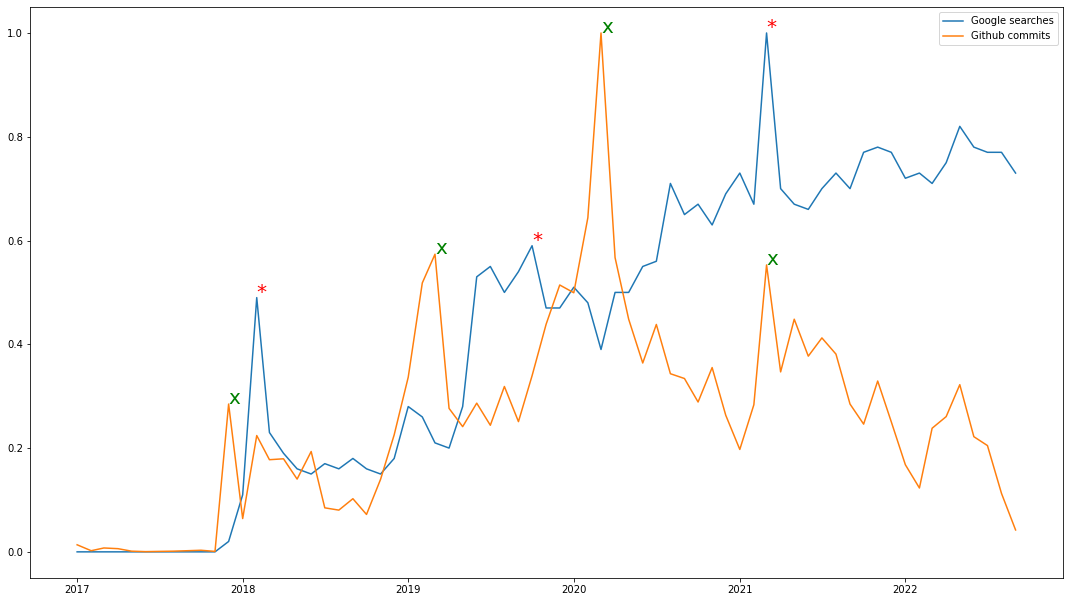

In [27]:
fig, ax = plt.subplots()

#ax = google_trends_df.search_freq.plot()
locs, labels=plt.xticks()

ax.plot(google_trends_df.index,google_trends_df.search_freq.values/google_trends_df.search_freq.values.max(), label="Google searches")
ax.plot(github_df.index,github_df.commits.values/github_df.commits.values.max(), label="Github commits")
#ax.plot(arxiv_df.index,arxiv_df.url.values/arxiv_df.url.values.max(), label="arxiv")


for peak in google_peaks[0]:
    ax.annotate("*",xy=(peak[0],peak[1]), fontsize=20, color="red")

for peak in github_peaks[0]:
    ax.annotate("x",xy=(peak[0],peak[1]), fontsize=20, color="green")

ax.legend()
    
fig.set_size_inches(18.5, 10.5)
plt.show()

2018-02-01 https://variety.com/2018/digital/news/reddit-twitter-deepfake-ban-1202690627/

2019-10-01 https://ai.facebook.com/blog/deepfake-detection-challenge/

2020-08-01 https://www.cnet.com/science/mit-releases-deepfake-video-of-nixon-announcing-nasa-apollo-11-disaster/
           https://www.theverge.com/2020/7/27/21339898/deepfake-audio-voice-clone-scam-attempt-nisos
           
2021-03-01 https://edition.cnn.com/videos/business/2021/03/02/tom-cruise-tiktok-deepfake-orig.cnn-business
           https://www.nytimes.com/2021/03/14/us/raffaela-spone-victory-vipers-deepfake.html

vs (maybe not)

https://en.wikipedia.org/wiki/Deepfake#Politics


Vajon miért csökken a Github aktivitás?

Nos, az emberek száma is csökken, akiket érdekel - lásd chart a github_analyzer notebookban.

Jobb lenne per repo megcsinálni a dolgot, mert az mutatná, hogy mennyire centralizálódik.

Ez egy jó mese elem lenne.

In [28]:
google_peaks[0]

[[numpy.datetime64('2018-02-01T00:00:00.000000000'), 0.49],
 [numpy.datetime64('2019-10-01T00:00:00.000000000'), 0.59],
 [numpy.datetime64('2021-03-01T00:00:00.000000000'), 1.0]]

In [29]:
pd.DataFrame(google_peaks[0])[0].diff()

0        NaT
1   607 days
2   517 days
Name: 0, dtype: timedelta64[ns]

18-20 havonta történik valamiféle kiugró esemény, ami rávilágít a deepfake témára, egy szinttel magasabbra emelve a közérdeklődést úgy, hogy annak általános szintje folyamatosan nő.

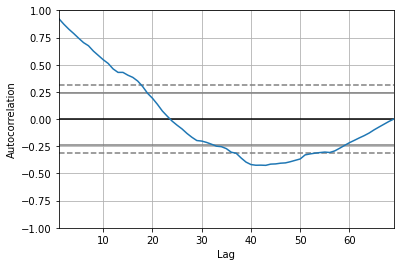

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(google_trends_df.search_freq)
plt.show()

<AxesSubplot:xlabel='month'>

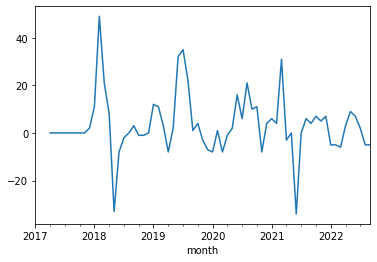

In [31]:
google_trends_df.search_freq.diff(3).plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

adfuller(google_trends_df.search_freq.diff(3).dropna())

(-3.6653938202960985,
 0.004627107597027201,
 7,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 407.31903730233296)

Bár egy idősorra nézve némi evidencia (mint például a Dickey-Fuller test, 0.005 alatti konfidencia értékkel) összegyűjthető egy adott idősor trendjének elemzésekor, így mondhatjuk, hogy exponenciális (3. diffrerencia) választásunkat adatokra alapozzuk, és ez jól illeszkedi az "exponenciálisan növekvő érdeklődés" narratívájához, ám megjegyzendő, hogy kvantitatív érvek hozhatók fel egy lineárisan növekvő trend mellett is. Mindezek ellenére mi most mégis bátran úgy döntünk, hogy exponenciális trendet feltételezve egy ARIMA(18,3,0) modellt felállítva illusztráljuk a növekvő közérdeklődés jövőjét.

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

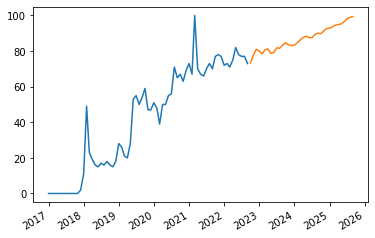

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(google_trends_df.search_freq, order=(18,3,0)).fit()
forecast = model.forecast(36)

fig, ax = plt.subplots()
ax.plot(google_trends_df.index,google_trends_df.search_freq.values, label="Google searches")

forecast.plot()

/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/alatus/anaconda3/envs/10_days_AI/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

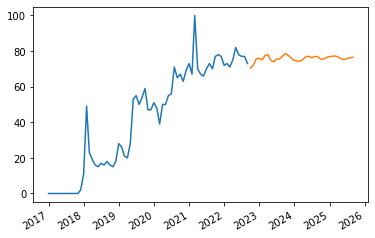

In [51]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(google_trends_df.search_freq, order=(18,1,0)).fit()
forecast = model.forecast(36)

fig, ax = plt.subplots()
ax.plot(google_trends_df.index,google_trends_df.search_freq.values, label="Google searches")

forecast.plot()

In [34]:
forecast

2022-10-01    73.356774
2022-11-01    77.583291
2022-12-01    81.009765
2023-01-01    79.997688
2023-02-01    78.341088
2023-03-01    80.706039
2023-04-01    81.225499
2023-05-01    78.651594
2023-06-01    79.220935
2023-07-01    81.794476
2023-08-01    81.577791
2023-09-01    83.226701
2023-10-01    84.753731
2023-11-01    83.509447
2023-12-01    83.020545
2024-01-01    83.357644
2024-02-01    84.634252
2024-03-01    86.186740
2024-04-01    87.594117
2024-05-01    88.372369
2024-06-01    87.590440
2024-07-01    87.433613
2024-08-01    89.273215
2024-09-01    90.031288
2024-10-01    89.746343
2024-11-01    91.241425
2024-12-01    92.646800
2025-01-01    92.841406
2025-02-01    93.600291
2025-03-01    94.533870
2025-04-01    94.894558
2025-05-01    95.220711
2025-06-01    96.410724
2025-07-01    98.086478
2025-08-01    98.887527
2025-09-01    99.351377
Freq: MS, Name: predicted_mean, dtype: float64

Látható, hogy ha a már fentebb említett kb másfél évenként bekövetkező "átütő híresemény" nem is következik be, akkoris folyamatos növekedést prognosztizálhatunk a deepfake technológia iránti közérdeklődésben.

In [35]:
window_size = 18

from sklearn.model_selection import train_test_split

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


rolled_data = rolling_window(google_trends_df.search_freq.values, window_size+1)

rolled_train_data, rolled_test_data = train_test_split(rolled_data, test_size=0.1, shuffle=False)

rolled_train_y = rolled_train_data[:,window_size]
rolled_train_x = rolled_train_data[:,:window_size]

rolled_test_y = rolled_test_data[:,window_size]
rolled_test_x = rolled_test_data[:,:window_size]


In [36]:
#!pip install --upgrade --force-reinstall tensorflow

In [37]:
#!pip install --upgrade --force-reinstall keras

In [38]:
!pip install --upgrade --force-reinstall tensorflow-addons

  Using cached tensorflow_addons-0.18.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.13.3
    Uninstalling typeguard-2.13.3:
      Successfully uninstalled typeguard-2.13.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.18.0
    Uninstalling tensorflow-addons-0.18.0:
      Successfully uninstalled tensorflow-addons-0.18.0


In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

 #import tensorflow.keras as keras
#import tensorflow_addons as tfa


tf.keras.backend.clear_session()

# Parameters
############

hidden_1_size = 17
hidden_2_size = 9

training_epochs = 1000
learning_rate = 0.01
l1_lambda = 0.00015

# Model
#######

inputs = Input(shape=(window_size,))

# Hidden layers

hidden_output_1 = Dense(hidden_1_size, activation='relu', kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda))(inputs)
hidden_output_2 = Dense(hidden_2_size, activation='relu', kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda))(hidden_output_1)

# Prediction layer
predictions = Dense(1, activation='linear')(hidden_output_2)


# Full model
model = Model(inputs=inputs, outputs=predictions)

# Optimizer
####################

optimizer = Adam(lr=learning_rate)
#radam = tfa.optimizers.RectifiedAdam()
#ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)
#optimizer = ranger
 

# Compilation and fitting 
#########################

model.compile(optimizer=optimizer, loss='mean_squared_error')

saver_callback = tf.keras.callbacks.ModelCheckpoint("model.hdf5", save_only_best=True)

history = model.fit(x=rolled_train_x, 
                    y=rolled_train_y,
                    validation_data=(rolled_test_x,rolled_test_y),
                    epochs=training_epochs,
                    batch_size=None,
                    callbacks=[saver_callback])

2022-09-21 15:25:55.786353: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-21 15:25:55.786549: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 15:25:55.786949: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-21 15:25:55.940011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-21 15:25:55.963454: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


Epoch 1/1000
2/2 [==============================] - 1s 549ms/step - loss: 5261.2171 - val_loss: 6005.8853
Epoch 2/1000
2/2 [==============================] - 0s 89ms/step - loss: 3231.5820 - val_loss: 3057.0188
Epoch 3/1000
2/2 [==============================] - 0s 128ms/step - loss: 1987.6771 - val_loss: 1814.5327
Epoch 4/1000
2/2 [==============================] - 0s 126ms/step - loss: 1321.8802 - val_loss: 837.6818
Epoch 5/1000
2/2 [==============================] - 0s 147ms/step - loss: 596.0381 - val_loss: 22.7298
Epoch 6/1000
2/2 [==============================] - 0s 76ms/step - loss: 201.8736 - val_loss: 786.4598
Epoch 7/1000
2/2 [==============================] - 0s 127ms/step - loss: 341.1090 - val_loss: 1787.6539
Epoch 8/1000
2/2 [==============================] - 0s 141ms/step - loss: 523.6510 - val_loss: 1677.6986
Epoch 9/1000
2/2 [==============================] - 0s 129ms/step - loss: 509.9662 - val_loss: 895.8620
Epoch 10/1000
2/2 [==============================] - 0s 13

2/2 [==============================] - 0s 120ms/step - loss: 62.1142 - val_loss: 51.1839
Epoch 81/1000
2/2 [==============================] - 0s 140ms/step - loss: 56.2829 - val_loss: 46.4994
Epoch 82/1000
2/2 [==============================] - 0s 141ms/step - loss: 59.9872 - val_loss: 50.9267
Epoch 83/1000
2/2 [==============================] - 0s 132ms/step - loss: 54.3310 - val_loss: 57.0695
Epoch 84/1000
2/2 [==============================] - 0s 135ms/step - loss: 63.5040 - val_loss: 58.4120
Epoch 85/1000
2/2 [==============================] - 0s 126ms/step - loss: 60.6808 - val_loss: 46.6330
Epoch 86/1000
2/2 [==============================] - 0s 140ms/step - loss: 58.8704 - val_loss: 38.2035
Epoch 87/1000
2/2 [==============================] - 0s 135ms/step - loss: 61.4297 - val_loss: 37.5392
Epoch 88/1000
2/2 [==============================] - 0s 130ms/step - loss: 61.1684 - val_loss: 41.9992
Epoch 89/1000
2/2 [==============================] - 0s 150ms/step - loss: 60.0962 - va

2/2 [==============================] - 0s 141ms/step - loss: 44.9609 - val_loss: 20.5499
Epoch 160/1000
2/2 [==============================] - 0s 99ms/step - loss: 47.3058 - val_loss: 20.5236
Epoch 161/1000
2/2 [==============================] - 0s 140ms/step - loss: 34.3414 - val_loss: 36.5242
Epoch 162/1000
2/2 [==============================] - 0s 129ms/step - loss: 33.1390 - val_loss: 83.3263
Epoch 163/1000
2/2 [==============================] - 0s 113ms/step - loss: 47.6604 - val_loss: 62.0885
Epoch 164/1000
2/2 [==============================] - 0s 124ms/step - loss: 45.3930 - val_loss: 17.5455
Epoch 165/1000
2/2 [==============================] - 0s 135ms/step - loss: 51.3729 - val_loss: 20.7068
Epoch 166/1000
2/2 [==============================] - 0s 132ms/step - loss: 43.4259 - val_loss: 20.1398
Epoch 167/1000
2/2 [==============================] - 0s 140ms/step - loss: 35.7142 - val_loss: 70.5442
Epoch 168/1000
2/2 [==============================] - 0s 140ms/step - loss: 49.2

Epoch 238/1000
2/2 [==============================] - 0s 153ms/step - loss: 29.0016 - val_loss: 19.5148
Epoch 239/1000
2/2 [==============================] - 0s 142ms/step - loss: 40.2908 - val_loss: 20.8644
Epoch 240/1000
2/2 [==============================] - 0s 127ms/step - loss: 37.5700 - val_loss: 31.5096
Epoch 241/1000
2/2 [==============================] - 0s 123ms/step - loss: 35.4204 - val_loss: 48.7737
Epoch 242/1000
2/2 [==============================] - 0s 129ms/step - loss: 30.2600 - val_loss: 53.8454
Epoch 243/1000
2/2 [==============================] - 0s 142ms/step - loss: 35.8947 - val_loss: 34.0870
Epoch 244/1000
2/2 [==============================] - 0s 135ms/step - loss: 29.9972 - val_loss: 23.8861
Epoch 245/1000
2/2 [==============================] - 0s 150ms/step - loss: 28.9006 - val_loss: 33.7418
Epoch 246/1000
2/2 [==============================] - 0s 119ms/step - loss: 28.7628 - val_loss: 54.6033
Epoch 247/1000
2/2 [==============================] - 0s 95ms/st

Epoch 317/1000
2/2 [==============================] - 0s 187ms/step - loss: 31.9116 - val_loss: 17.2586
Epoch 318/1000
2/2 [==============================] - 0s 145ms/step - loss: 30.1765 - val_loss: 16.6236
Epoch 319/1000
2/2 [==============================] - 0s 149ms/step - loss: 38.5705 - val_loss: 57.1064
Epoch 320/1000
2/2 [==============================] - 0s 148ms/step - loss: 34.1452 - val_loss: 49.3843
Epoch 321/1000
2/2 [==============================] - 0s 170ms/step - loss: 32.1037 - val_loss: 18.3554
Epoch 322/1000
2/2 [==============================] - 0s 135ms/step - loss: 31.8500 - val_loss: 16.0053
Epoch 323/1000
2/2 [==============================] - 0s 149ms/step - loss: 34.9320 - val_loss: 21.7996
Epoch 324/1000
2/2 [==============================] - 0s 151ms/step - loss: 26.3236 - val_loss: 43.2679
Epoch 325/1000
2/2 [==============================] - 0s 185ms/step - loss: 26.6285 - val_loss: 59.0099
Epoch 326/1000
2/2 [==============================] - 0s 129ms/s

Epoch 396/1000
2/2 [==============================] - 0s 155ms/step - loss: 39.1406 - val_loss: 83.0742
Epoch 397/1000
2/2 [==============================] - 0s 182ms/step - loss: 36.7989 - val_loss: 18.1370
Epoch 398/1000
2/2 [==============================] - 0s 185ms/step - loss: 33.3046 - val_loss: 20.8589
Epoch 399/1000
2/2 [==============================] - 0s 105ms/step - loss: 37.0144 - val_loss: 24.9656
Epoch 400/1000
2/2 [==============================] - 0s 160ms/step - loss: 27.7768 - val_loss: 68.4111
Epoch 401/1000
2/2 [==============================] - 0s 145ms/step - loss: 33.0649 - val_loss: 40.1180
Epoch 402/1000
2/2 [==============================] - 0s 158ms/step - loss: 27.6678 - val_loss: 18.6607
Epoch 403/1000
2/2 [==============================] - 0s 135ms/step - loss: 34.6133 - val_loss: 19.6027
Epoch 404/1000
2/2 [==============================] - 0s 139ms/step - loss: 34.7288 - val_loss: 36.8246
Epoch 405/1000
2/2 [==============================] - 0s 112ms/s

Epoch 475/1000
2/2 [==============================] - 0s 93ms/step - loss: 23.3648 - val_loss: 42.0197
Epoch 476/1000
2/2 [==============================] - 0s 79ms/step - loss: 24.2041 - val_loss: 29.5362
Epoch 477/1000
2/2 [==============================] - 0s 101ms/step - loss: 22.3114 - val_loss: 32.7255
Epoch 478/1000
2/2 [==============================] - 0s 141ms/step - loss: 21.7169 - val_loss: 45.1046
Epoch 479/1000
2/2 [==============================] - 0s 137ms/step - loss: 27.2832 - val_loss: 39.1681
Epoch 480/1000
2/2 [==============================] - 0s 91ms/step - loss: 24.4113 - val_loss: 29.7000
Epoch 481/1000
2/2 [==============================] - 0s 155ms/step - loss: 24.8968 - val_loss: 65.8342
Epoch 482/1000
2/2 [==============================] - 0s 183ms/step - loss: 29.6551 - val_loss: 56.3205
Epoch 483/1000
2/2 [==============================] - 0s 148ms/step - loss: 24.4659 - val_loss: 20.6737
Epoch 484/1000
2/2 [==============================] - 0s 161ms/step

Epoch 554/1000
2/2 [==============================] - 0s 170ms/step - loss: 22.6761 - val_loss: 31.6879
Epoch 555/1000
2/2 [==============================] - 0s 146ms/step - loss: 24.7803 - val_loss: 72.6652
Epoch 556/1000
2/2 [==============================] - 0s 138ms/step - loss: 30.2966 - val_loss: 46.5055
Epoch 557/1000
2/2 [==============================] - 0s 139ms/step - loss: 25.2582 - val_loss: 20.3144
Epoch 558/1000
2/2 [==============================] - 0s 132ms/step - loss: 30.3015 - val_loss: 20.5300
Epoch 559/1000
2/2 [==============================] - 0s 130ms/step - loss: 25.1388 - val_loss: 34.4305
Epoch 560/1000
2/2 [==============================] - 0s 148ms/step - loss: 24.2106 - val_loss: 86.2280
Epoch 561/1000
2/2 [==============================] - 0s 123ms/step - loss: 33.2112 - val_loss: 36.1466
Epoch 562/1000
2/2 [==============================] - 0s 121ms/step - loss: 24.5332 - val_loss: 23.8984
Epoch 563/1000
2/2 [==============================] - 0s 135ms/s

Epoch 633/1000
2/2 [==============================] - 0s 134ms/step - loss: 24.6075 - val_loss: 50.8647
Epoch 634/1000
2/2 [==============================] - 0s 143ms/step - loss: 20.6603 - val_loss: 39.5814
Epoch 635/1000
2/2 [==============================] - 0s 129ms/step - loss: 23.0657 - val_loss: 31.3601
Epoch 636/1000
2/2 [==============================] - 0s 129ms/step - loss: 21.0018 - val_loss: 37.2956
Epoch 637/1000
2/2 [==============================] - 0s 125ms/step - loss: 21.0149 - val_loss: 60.1471
Epoch 638/1000
2/2 [==============================] - 0s 150ms/step - loss: 25.5812 - val_loss: 45.7587
Epoch 639/1000
2/2 [==============================] - 0s 139ms/step - loss: 23.4236 - val_loss: 26.8583
Epoch 640/1000
2/2 [==============================] - 0s 145ms/step - loss: 25.3400 - val_loss: 25.1948
Epoch 641/1000
2/2 [==============================] - 0s 155ms/step - loss: 27.0962 - val_loss: 28.7497
Epoch 642/1000
2/2 [==============================] - 0s 144ms/s

Epoch 712/1000
2/2 [==============================] - 0s 169ms/step - loss: 17.1647 - val_loss: 33.9492
Epoch 713/1000
2/2 [==============================] - 0s 124ms/step - loss: 20.2255 - val_loss: 32.9308
Epoch 714/1000
2/2 [==============================] - 0s 136ms/step - loss: 20.6724 - val_loss: 26.0772
Epoch 715/1000
2/2 [==============================] - 0s 162ms/step - loss: 20.1315 - val_loss: 27.9103
Epoch 716/1000
2/2 [==============================] - 0s 145ms/step - loss: 16.8788 - val_loss: 32.7274
Epoch 717/1000
2/2 [==============================] - 0s 172ms/step - loss: 19.8669 - val_loss: 49.7622
Epoch 718/1000
2/2 [==============================] - 0s 137ms/step - loss: 22.2790 - val_loss: 23.0814
Epoch 719/1000
2/2 [==============================] - 0s 170ms/step - loss: 18.0261 - val_loss: 22.3088
Epoch 720/1000
2/2 [==============================] - 0s 137ms/step - loss: 25.4272 - val_loss: 16.7169
Epoch 721/1000
2/2 [==============================] - 0s 139ms/s

Epoch 791/1000
2/2 [==============================] - 0s 189ms/step - loss: 19.4485 - val_loss: 20.3249
Epoch 792/1000
2/2 [==============================] - 0s 176ms/step - loss: 12.0347 - val_loss: 46.6749
Epoch 793/1000
2/2 [==============================] - 0s 164ms/step - loss: 26.2568 - val_loss: 33.6609
Epoch 794/1000
2/2 [==============================] - 0s 183ms/step - loss: 17.7161 - val_loss: 34.4822
Epoch 795/1000
2/2 [==============================] - 0s 160ms/step - loss: 20.7016 - val_loss: 22.0773
Epoch 796/1000
2/2 [==============================] - 0s 140ms/step - loss: 17.7398 - val_loss: 19.3447
Epoch 797/1000
2/2 [==============================] - 0s 170ms/step - loss: 15.6765 - val_loss: 18.8793
Epoch 798/1000
2/2 [==============================] - 0s 145ms/step - loss: 13.9453 - val_loss: 21.1835
Epoch 799/1000
2/2 [==============================] - 0s 150ms/step - loss: 15.9521 - val_loss: 23.4768
Epoch 800/1000
2/2 [==============================] - 0s 124ms/s

Epoch 870/1000
2/2 [==============================] - 0s 140ms/step - loss: 11.7535 - val_loss: 24.5982
Epoch 871/1000
2/2 [==============================] - 0s 160ms/step - loss: 11.3924 - val_loss: 18.0965
Epoch 872/1000
2/2 [==============================] - 0s 160ms/step - loss: 8.8368 - val_loss: 14.6180
Epoch 873/1000
2/2 [==============================] - 0s 157ms/step - loss: 12.1677 - val_loss: 14.8364
Epoch 874/1000
2/2 [==============================] - 0s 131ms/step - loss: 12.5962 - val_loss: 26.1909
Epoch 875/1000
2/2 [==============================] - 0s 146ms/step - loss: 12.8892 - val_loss: 23.4386
Epoch 876/1000
2/2 [==============================] - 0s 155ms/step - loss: 11.7683 - val_loss: 27.9512
Epoch 877/1000
2/2 [==============================] - 0s 150ms/step - loss: 12.6964 - val_loss: 24.6167
Epoch 878/1000
2/2 [==============================] - 0s 184ms/step - loss: 10.4898 - val_loss: 20.6651
Epoch 879/1000
2/2 [==============================] - 0s 182ms/st

2/2 [==============================] - 0s 149ms/step - loss: 10.7283 - val_loss: 21.8963
Epoch 950/1000
2/2 [==============================] - 0s 191ms/step - loss: 9.3599 - val_loss: 34.0762
Epoch 951/1000
2/2 [==============================] - 0s 184ms/step - loss: 10.2363 - val_loss: 20.7351
Epoch 952/1000
2/2 [==============================] - 0s 158ms/step - loss: 8.0947 - val_loss: 19.4242
Epoch 953/1000
2/2 [==============================] - 0s 150ms/step - loss: 10.5598 - val_loss: 19.9121
Epoch 954/1000
2/2 [==============================] - 0s 150ms/step - loss: 8.2937 - val_loss: 16.2992
Epoch 955/1000
2/2 [==============================] - 0s 164ms/step - loss: 9.7797 - val_loss: 12.7964
Epoch 956/1000
2/2 [==============================] - 0s 167ms/step - loss: 9.6735 - val_loss: 20.1049
Epoch 957/1000
2/2 [==============================] - 0s 136ms/step - loss: 9.4363 - val_loss: 26.6727
Epoch 958/1000
2/2 [==============================] - 0s 148ms/step - loss: 8.1035 - 

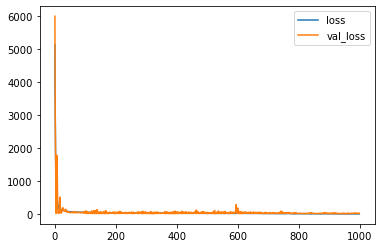

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

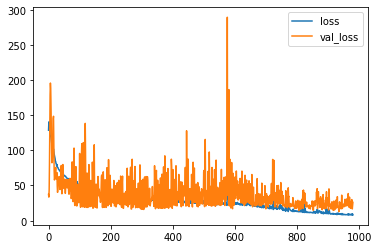

In [41]:
plt.plot(history.history["loss"][20:], label="loss")
plt.plot(history.history["val_loss"][20:], label="val_loss")
plt.legend()
plt.show()

In [42]:
print("The minimum for the val_loss is at epoch:",np.array(history.history["val_loss"]).argmin()+1)

The minimum for the val_loss is at epoch: 955


In [43]:
np.array(history.history["val_loss"]).min()

12.79639720916748

In [44]:
best_model = tf.keras.models.load_model("model.hdf5")

In [45]:
from datetime import timedelta
train_data, test_data = train_test_split(google_trends_df, test_size=0.1, shuffle=False)

train_predictions = best_model.predict(rolled_train_x)
test_predictions  = best_model.predict(rolled_test_x)


out_layer_result_train = pd.Series(train_predictions.flatten())
out_layer_result_test = pd.Series(test_predictions.flatten())

idx = train_data.index[window_size:]
idx = list(idx)
idx.append(train_data.index[-1]+timedelta(days=30))

# Don't ask why this index shit is necessary :-(

out_layer_result_train.index = pd.Index(idx)

out_layer_result_test.index =test_data.index[1:] 

In [46]:
def rolling_predict(model, start_window, steps=36):
    
    result = np.zeros(steps)
    
    prediction  = model.predict(start_window.reshape(1,-1))
    
    result[0] = prediction
    
    window = start_window.reshape(1,-1)
    
    for step in range(steps-1):
        window = np.roll(window, shift=-1)
        window[0,-1] = prediction
        prediction  = model.predict(window)
        result[step+1] = prediction
    return result

rolling_prediction = rolling_predict(best_model, rolled_test_x[-1])

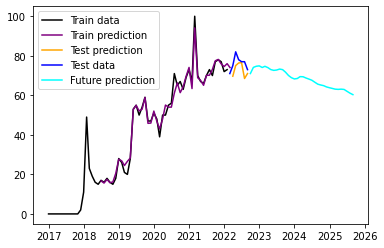

In [50]:
plt.close()
plt.plot(train_data["search_freq"], label="Train data", color="black")
plt.plot(out_layer_result_train, label="Train prediction", color="purple")
plt.plot(out_layer_result_test, label="Test prediction", color="orange")
plt.plot(test_data["search_freq"], label="Test data", color="blue")
plt.plot(forecast.index,rolling_prediction, label="Future prediction", color="cyan")

plt.legend()
plt.show()